# Task 4.2 Importing the Necessary Libraries

In [ ]:
# For data creation and other tasks
import numpy as np
import pandas as pd
import random
pd.set_option('display.max_rows', 500) #View all the rows data better
pd.set_option('display.max_columns',200) #View all the columns better

## Mertics to evaluate the models
from sklearn.metrics import accuracy_score # for Logistic Regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import log_loss

# For plotting the graphs ..
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



# For spliting the data into 80:20 ratio
from sklearn.model_selection import train_test_split

# Task 4.1 Load Dataset
Load the classification dataset. [Dataset = Biomechanical features of orthopedic patients]. Load the
dataset using pandas. Explore the dataset using pandas methods such as head(), info(), and describe().

In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/column_2C_weka.csv')

In [ ]:
df1

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Abnormal
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Abnormal
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,Abnormal
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Abnormal
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Abnormal


In [ ]:
df1.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [ ]:
df1.columns

Index(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


Transform the data to input features and binary classified output features containing target values

Any matrix is typically represented using capital letters

In [ ]:
#Input Features
X=np.array(df1[['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']])
filtering = lambda row: 0 if row['class'] == "Abnormal" else 1
# #Output Class
scaler=MinMaxScaler()
scaler.fit(X)
Y=df1.apply(filtering,axis=1)
X=scaler.transform(X)

# Task 4.3 Initialize weights and bias as 0:

In [ ]:
def weightInitialization (n_features):
    b=random.randint(0,n_features)
    w=np.random.randint(n_features,size=(n_features,))
    return w,b

In [ ]:
#Test Task 2
weightInitialization(X.shape[1])

(array([1, 2, 3, 3, 0, 2]), 2)

# Task 4.4 Sigmoid Function:

In [ ]:
def sigmoid_activation(z):
    y=1/(1+np.exp(-z))
    return y

# Task 4.5 Model Optimization Function:

In [ ]:
def hypothesis(w, X):
    return np.dot(X,w)

def model_optimize(w,b,X,Y):
    m=Y.shape[0] #Number of Data
    n=X.shape[1] #Number of Features
    Y_pred=sigmoid_activation(hypothesis(w,X))
    # Find the cost / loss
    loss=-(1/m)*np.sum(np.multiply(Y,np.log(Y_pred))+np.multiply((1-Y),np.log(1-Y_pred)))
    # Calculate the gradients
    dw=(1/m)*np.sum(np.matmul((Y_pred-Y).T,X))
    db=(1/m)*np.sum((Y_pred-Y))
    grads = {"dw": dw , "db": db}
    return grads , loss

In [ ]:
#Test Task 4
w,b=weightInitialization(X.shape[1])
print(w,b)
model_optimize(w,b,X,Y)

[2 4 3 1 1 3] 5


({'dw': 1.390006517595476, 'db': 0.6523962677896089}, 3.323504830776072)

# Task 4.6 Model Optimization:
Run the optimization function for a given number of epochs and get the final weights along with a
list of cost for each epoch

In [ ]:
def model_fit (w, b, X, Y, learning_rate , no_iterations ):
    costs = []
    for i in range ( no_iterations ):
        grads , cost = model_optimize (w,b,X,Y)
        dw = grads ["dw"]
        db = grads ["db"]
        # Update the weights here
        w=w-learning_rate*dw
        b=b-learning_rate*db
        costs.append (cost)
            #print (" Cost after %i iteration is %f" %(i, cost ))
    coeff = {"w": w, "b": b}
    return coeff , costs

In [ ]:
#Test Task 5
w,b=weightInitialization(X.shape[1])
model_fit(w,b,X,Y,0.01,80)

({'w': array([ 3.80216879, -0.24831403,  2.80050831,  1.84518301,  2.74723014,
          0.93903736]),
  'b': 5.477433441700906},
 [3.246691952874777,
  3.210183996852591,
  3.1737490895984557,
  3.1373902590128275,
  3.1011106505591566,
  3.0649135308739246,
  3.0288022913865262,
  2.992780451936685])

# Task 4.7 Use logistic regression for your dataset:


In [ ]:
ALPHA=0.01
EPOCHS=4000
X_train,X_test,y_train, y_test=train_test_split(X,Y,test_size=0.3,shuffle=True)
w,b=weightInitialization(X.shape[1])
coeff,costs=model_fit(w,b,X_train,y_train,ALPHA,EPOCHS)
Y_pred=sigmoid_activation(hypothesis(coeff['w'],X_test))
Y_pred=np.where(Y_pred>=0.5,1,0)
accuracy_score(y_test,Y_pred)

0.6559139784946236

# Task 4.8 Plot the cost for each epoch:
Use the costs list to plot the cost vs. epoch curve.

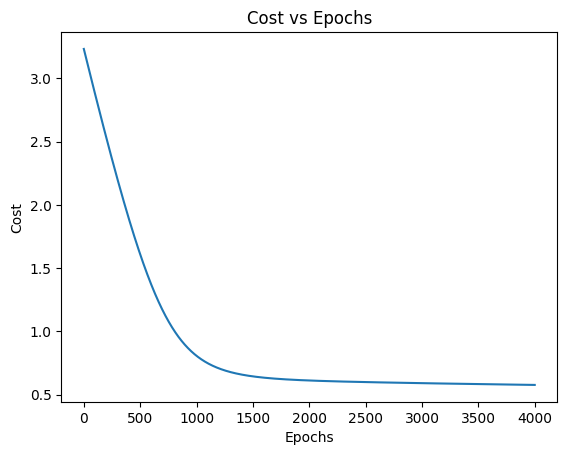

In [ ]:
iter=np.arange(0,EPOCHS,1)
fig, ax = plt.subplots()
ax.plot(iter,costs)
ax.set_xlabel("Epochs")
ax.set_ylabel("Cost")
ax.set_title("Cost vs Epochs")
plt.show()

# Task 4.9 Use smaller portion of training data:
Show how the accuracy of the test dataset changes when you use 10%, 20%, and so on of the training
dataset.

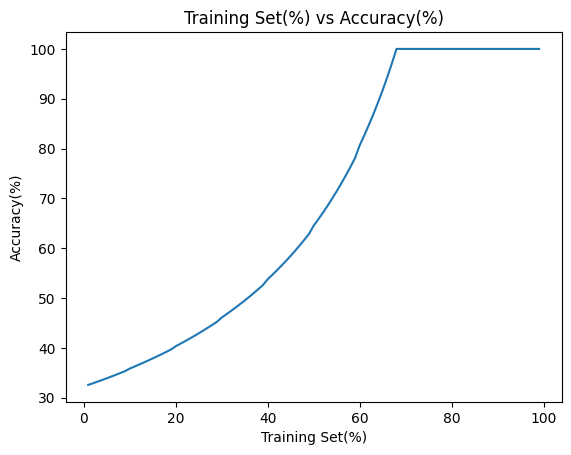

In [ ]:
ALPHA=0.01
EPOCHS=100
def accuracy(X,Y):
    accuracy_list=[]
    for i in range(1,100,1):
        X_train,X_test,y_train, y_test=train_test_split(X,Y,test_size=(100-i)/100,shuffle=False)
        w,b=weightInitialization(X.shape[1])
        coeff,costs=model_fit(w,b,X_train,y_train,ALPHA,EPOCHS)
        Y_pred=sigmoid_activation(hypothesis(coeff['w'],X_test))
        Y_pred=np.where(Y_pred>=0.5,1,0)
        accuracy_list.append(accuracy_score(y_test,Y_pred)*100)
    return accuracy_list

fig, ax = plt.subplots()
x=np.arange(1,100,1)
y=accuracy(X,Y)
ax.plot(x,y)
ax.set_xlabel('Training Set(%)')
ax.set_ylabel('Accuracy(%)')
ax.set_title('Training Set(%) vs Accuracy(%)')
plt.show()
#After 60% the model starts to become overfit or tuned to training set, and the accuracy does not improve significantly

# 4.10 L1 L2 Regularization:
Adapt the function model_optimize to include regularization.

In [ ]:
def hypothesis(w, X):
    return np.dot(X, w)

def model_optimize(w, b, X, Y, reg=None, lambda_=0.1):
    m = Y.shape[0]  # Number of Data
    n = X.shape[1]  # Number of Features
    Y_pred = sigmoid_activation(hypothesis(w, X))

    l1_regularization = 0
    l2_regularization = 0

    if reg == "L1":
        l1_regularization = lambda_ * np.sum(np.abs(w))
    elif reg == "L2":
        l2_regularization = lambda_ * np.sum(np.square(w))
    loss = -(1 / m) * np.sum(np.multiply(Y, np.log(Y_pred)) + np.multiply((1 - Y), np.log(1 - Y_pred))) + l1_regularization + l2_regularization
    dw=(1/m)*np.sum(np.matmul((Y_pred-Y).T,X))
    db=(1/m)*np.sum((Y_pred-Y))
    if(reg=="L1"):
        dw=dw+(lambda_/m)*np.sign(w)
    elif(reg=="L2"):
        dw=dw+(lambda_/m)*w
    db = (1 / m) * np.sum(Y_pred - Y)
    grads = {"dw": dw, "db": db}
    return grads, loss

# 4.11 Accuracy change with regularization :
Train the model for different epochs, different regularization (none, L1, L2) and different regularization coefficient values then show the test accuracies found in a table.

In [ ]:
def model_fit (w, b, X, Y, learning_rate , no_iterations,reg=None,lambda_=0.1 ):
    costs = []
    for i in range ( no_iterations ):
        grads , cost = model_optimize (w,b,X,Y,reg,lambda_)
        dw = grads ["dw"]
        db = grads ["db"]
        w=w-learning_rate*dw
        b=b-learning_rate*db
        if (i % 10 == 0):
            costs.append (cost)
    coeff = {"w": w, "b": b}
    return coeff , costs

In [ ]:
#Split the training set as before in the 80:20 ratio
X_train,X_test,y_train, y_test=train_test_split(X,Y,test_size=0.2,shuffle=True)

In [ ]:
EPOCHS = np.concatenate((
    np.arange(10, 100, 10),
    np.arange(100, 500, 100),
    np.arange(500, 1300, 200),
))
EPOCHS

array([  10,   20,   30,   40,   50,   60,   70,   80,   90,  100,  200,
        300,  400,  500,  700,  900, 1100])

In [ ]:
#No Regularization
ALPHA=0.01
no=[]
for j in EPOCHS:
    w,b=weightInitialization(X_train.shape[1])
    coeff,costs=model_fit(w,b,X_train,y_train,ALPHA,j,"L1",i)
    Y_pred=sigmoid_activation(hypothesis(coeff['w'],X_test))
    Y_pred=np.where(Y_pred>=0.5,1,0)
    no.append(accuracy_score(y_test,Y_pred))

### No Regularization Accuracy

In [ ]:
df3=pd.DataFrame(no,index=EPOCHS,columns=['Accuracy'])
df3.name="No Regularization"
df3

,Accuracy
10,0.225806
20,0.225806
30,0.225806
40,0.225806
50,0.241935
60,0.258065
70,0.225806
80,0.225806
90,0.241935
100,0.225806


In [ ]:
#L1 Regularization
LAMBDA_ = np.concatenate((
    np.arange(0.01, 0.1, 0.01),
    np.arange(0.1, 1.0, 0.1),
    np.arange(1, 10, 1),
    np.arange(10, 100, 10),
    np.arange(100, 1100, 100)
))
LAMBDA_

array([1.e-02, 2.e-02, 3.e-02, 4.e-02, 5.e-02, 6.e-02, 7.e-02, 8.e-02,
       9.e-02, 1.e-01, 2.e-01, 3.e-01, 4.e-01, 5.e-01, 6.e-01, 7.e-01,
       8.e-01, 9.e-01, 1.e+00, 2.e+00, 3.e+00, 4.e+00, 5.e+00, 6.e+00,
       7.e+00, 8.e+00, 9.e+00, 1.e+01, 2.e+01, 3.e+01, 4.e+01, 5.e+01,
       6.e+01, 7.e+01, 8.e+01, 9.e+01, 1.e+02, 2.e+02, 3.e+02, 4.e+02,
       5.e+02, 6.e+02, 7.e+02, 8.e+02, 9.e+02, 1.e+03])

In [ ]:
l1=[]
for j in EPOCHS:
    result=[]
    for i in LAMBDA_:
        w,b=weightInitialization(X_train.shape[1])
        coeff,costs=model_fit(w,b,X_train,y_train,ALPHA,j,"L1",i)
        Y_pred=sigmoid_activation(hypothesis(coeff['w'],X_test))
        Y_pred=np.where(Y_pred>=0.5,1,0)
        result.append(accuracy_score(y_test,Y_pred))
    l1.append(result)

### L1 Regularization Accuracy

In [ ]:
df4=pd.DataFrame(l1,columns=LAMBDA_,index=EPOCHS)
df4.name="L1 Regularization"
df4

,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,10.00,20.00,30.00,40.00,50.00,60.00,70.00,80.00,90.00,100.00,200.00,300.00,400.00,500.00,600.00,700.00,800.00,900.00,1000.00
10,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.241935,0.225806,0.225806,0.225806,0.225806,0.241935,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.258065,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806
20,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.241935,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806
30,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.258065,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806
40,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.258065,0.225806,0.193548,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806
50,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.258065,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806
60,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.451613,0.225806,0.225806,0.225806,0.258065,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.580645
70,0.274194,0.225806,0.258065,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.241935,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.241935,0.225806,0.225806,0.225806
80,0.290323,0.225806,0.241935,0.225806,0.225806,0.225806,0.225806,0.435484,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.258065,0.274194,0.193548,0.241935,0.225806,0.225806,0.225806,0.193548,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.241935,0.225806,0.225806,0.225806,0.225806,0.225806,0.241935,0.225806,0.225806,0.225806,0.225806
90,0.322581,0.225806,0.225806,0.225806,0.241935,0.225806,0.241935,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.338710,0.225806,0.225806,0.225806,0.225806,0.225806,0.322581,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.258065,0.225806,0.225806,0.225806,0.274194,0.225806,0.241935,0.225806,0.225806,0.225806,0.225806,0.225806,0.241935,0.22

In [ ]:
#L2 Regularization
l2=[]
for j in EPOCHS:
    result=[]
    for i in LAMBDA_:
        w,b=weightInitialization(X_train.shape[1])
        coeff,costs=model_fit(w,b,X_train,y_train,ALPHA,j,"L2",i)
        Y_pred=sigmoid_activation(hypothesis(coeff['w'],X_test))
        Y_pred=np.where(Y_pred>=0.5,1,0)
        result.append(accuracy_score(y_test,Y_pred))
    l2.append(result)

### L2 Regularization Accuracy

In [ ]:
df5=pd.DataFrame(l2,columns=LAMBDA_,index=EPOCHS)
df5.name="L2 Regularization"
df5

,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,10.00,20.00,30.00,40.00,50.00,60.00,70.00,80.00,90.00,100.00,200.00,300.00,400.00,500.00,600.00,700.00,800.00,900.00,1000.00
10,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.241935,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.241935
20,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.241935,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806
30,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806
40,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.241935,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.258065,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806
50,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.274194,0.258065,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.193548,0.225806,0.225806,0.225806,0.225806,0.225806,0.209677,0.225806,0.241935,0.241935,0.241935
60,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.274194,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.241935,0.225806,0.209677,0.225806,0.580645,0.403226,0.225806
70,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.258065,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.274194,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.258065,0.225806,0.258065,0.225806,0.225806,0.225806,0.225806,0.225806,0.241935,0.290323,0.225806,0.290323,0.225806,0.209677,0.225806,0.661290
80,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.258065,0.258065,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.241935,0.258065,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.258065,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.241935,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.258065,0.225806,0.225806,0.774194,0.774194,0.774194
90,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.193548,0.258065,0.225806,0.225806,0.241935,0.225806,0.225806,0.225806,0.241935,0.225806,0.258065,0.225806,0.225806,0.225806,0.225806,0.258065,0.225806,0.225806,0.225806,0.258065,0.225806,0.225806,0.225806,0.258065,0.225806,0.225806,0.225806,0.225806,0.241935,0.225806,0.225806,0.225806,0.580645,0.225806,0.338710,0.225806,0.790323,0.77

In [ ]:
l1=np.array(l1)
l2=np.array(l2)
no=np.array(no)
no=no.reshape(17,1)


In [ ]:
result = np.concatenate((no, l1, l2), axis=1)
result

array([[0.22580645, 0.22580645, 0.22580645, ..., 0.22580645, 0.22580645,
        0.24193548],
       [0.22580645, 0.22580645, 0.22580645, ..., 0.22580645, 0.22580645,
        0.22580645],
       [0.22580645, 0.22580645, 0.22580645, ..., 0.22580645, 0.22580645,
        0.22580645],
       ...,
       [0.75806452, 0.75806452, 0.74193548, ..., 0.77419355, 0.77419355,
        0.77419355],
       [0.77419355, 0.74193548, 0.74193548, ..., 0.77419355, 0.77419355,
        0.77419355],
       [0.75806452, 0.72580645, 0.77419355, ..., 0.77419355, 0.77419355,
        0.77419355]])

In [ ]:
columnl1=[]
columnl2=[]
columnNo=["No Regularization"]
for i in LAMBDA_:
    columnl1.append(f'L1 Regularization with {i:.2f}')
    columnl2.append(f'L2 Regularization with {i:.2f}')
columnHeaders=columnNo+columnl1+columnl2

In [ ]:
df6=pd.DataFrame(result,columns=columnHeaders,index=EPOCHS)
df6

,No Regularization,L1 Regularization with 0.01,L1 Regularization with 0.02,L1 Regularization with 0.03,L1 Regularization with 0.04,L1 Regularization with 0.05,L1 Regularization with 0.06,L1 Regularization with 0.07,L1 Regularization with 0.08,L1 Regularization with 0.09,L1 Regularization with 0.10,L1 Regularization with 0.20,L1 Regularization with 0.30,L1 Regularization with 0.40,L1 Regularization with 0.50,L1 Regularization with 0.60,L1 Regularization with 0.70,L1 Regularization with 0.80,L1 Regularization with 0.90,L1 Regularization with 1.00,L1 Regularization with 2.00,L1 Regularization with 3.00,L1 Regularization with 4.00,L1 Regularization with 5.00,L1 Regularization with 6.00,L1 Regularization with 7.00,L1 Regularization with 8.00,L1 Regularization with 9.00,L1 Regularization with 10.00,L1 Regularization with 20.00,L1 Regularization with 30.00,L1 Regularization with 40.00,L1 Regularization with 50.00,L1 Regularization with 60.00,L1 Regularization with 70.00,L1 Regularization with 80.00,L1 Regularization with 90.00,L1 Regularization with 100.00,L1 Regularization with 200.00,L1 Regularization with 300.00,L1 Regularization with 400.00,L1 Regularization with 500.00,L1 Regularization with 600.00,L1 Regularization with 700.00,L1 Regularization with 800.00,L1 Regularization with 900.00,L1 Regularization with 1000.00,L2 Regularization with 0.01,L2 Regularization with 0.02,L2 Regularization with 0.03,L2 Regularization with 0.04,L2 Regularization with 0.05,L2 Regularization with 0.06,L2 Regularization with 0.07,L2 Regularization with 0.08,L2 Regularization with 0.09,L2 Regularization with 0.10,L2 Regularization with 0.20,L2 Regularization with 0.30,L2 Regularization with 0.40,L2 Regularization with 0.50,L2 Regularization with 0.60,L2 Regularization with 0.70,L2 Regularization with 0.80,L2 Regularization with 0.90,L2 Regularization with 1.00,L2 Regularization with 2.00,L2 Regularization with 3.00,L2 Regularization with 4.00,L2 Regularization with 5.00,L2 Regularization with 6.00,L2 Regularization with 7.00,L2 Regularization with 8.00,L2 Regularization with 9.00,L2 Regularization with 10.00,L2 Regularization with 20.00,L2 Regularization with 30.00,L2 Regularization with 40.00,L2 Regularization with 50.00,L2 Regularization with 60.00,L2 Regularization with 70.00,L2 Regularization with 80.00,L2 Regularization with 90.00,L2 Regularization with 100.00,L2 Regularization with 200.00,L2 Regularization with 300.00,L2 Regularization with 400.00,L2 Regularization with 500.00,L2 Regularization with 600.00,L2 Regularization with 700.00,L2 Regularization with 800.00,L2 Regularization with 900.00,L2 Regularization with 1000.00
10,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.241935,0.225806,0.225806,0.225806,0.225806,0.241935,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.258065,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.241935,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.241935
20,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.241935,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.225806,0.22580

In [ ]:
description=df6.describe()
description

,No Regularization,L1 Regularization with 0.01,L1 Regularization with 0.02,L1 Regularization with 0.03,L1 Regularization with 0.04,L1 Regularization with 0.05,L1 Regularization with 0.06,L1 Regularization with 0.07,L1 Regularization with 0.08,L1 Regularization with 0.09,L1 Regularization with 0.10,L1 Regularization with 0.20,L1 Regularization with 0.30,L1 Regularization with 0.40,L1 Regularization with 0.50,L1 Regularization with 0.60,L1 Regularization with 0.70,L1 Regularization with 0.80,L1 Regularization with 0.90,L1 Regularization with 1.00,L1 Regularization with 2.00,L1 Regularization with 3.00,L1 Regularization with 4.00,L1 Regularization with 5.00,L1 Regularization with 6.00,L1 Regularization with 7.00,L1 Regularization with 8.00,L1 Regularization with 9.00,L1 Regularization with 10.00,L1 Regularization with 20.00,L1 Regularization with 30.00,L1 Regularization with 40.00,L1 Regularization with 50.00,L1 Regularization with 60.00,L1 Regularization with 70.00,L1 Regularization with 80.00,L1 Regularization with 90.00,L1 Regularization with 100.00,L1 Regularization with 200.00,L1 Regularization with 300.00,L1 Regularization with 400.00,L1 Regularization with 500.00,L1 Regularization with 600.00,L1 Regularization with 700.00,L1 Regularization with 800.00,L1 Regularization with 900.00,L1 Regularization with 1000.00,L2 Regularization with 0.01,L2 Regularization with 0.02,L2 Regularization with 0.03,L2 Regularization with 0.04,L2 Regularization with 0.05,L2 Regularization with 0.06,L2 Regularization with 0.07,L2 Regularization with 0.08,L2 Regularization with 0.09,L2 Regularization with 0.10,L2 Regularization with 0.20,L2 Regularization with 0.30,L2 Regularization with 0.40,L2 Regularization with 0.50,L2 Regularization with 0.60,L2 Regularization with 0.70,L2 Regularization with 0.80,L2 Regularization with 0.90,L2 Regularization with 1.00,L2 Regularization with 2.00,L2 Regularization with 3.00,L2 Regularization with 4.00,L2 Regularization with 5.00,L2 Regularization with 6.00,L2 Regularization with 7.00,L2 Regularization with 8.00,L2 Regularization with 9.00,L2 Regularization with 10.00,L2 Regularization with 20.00,L2 Regularization with 30.00,L2 Regularization with 40.00,L2 Regularization with 50.00,L2 Regularization with 60.00,L2 Regularization with 70.00,L2 Regularization with 80.00,L2 Regularization with 90.00,L2 Regularization with 100.00,L2 Regularization with 200.00,L2 Regularization with 300.00,L2 Regularization with 400.00,L2 Regularization with 500.00,L2 Regularization with 600.00,L2 Regularization with 700.00,L2 Regularization with 800.00,L2 Regularization with 900.00,L2 Regularization with 1000.00
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,0.418406,0.441176,0.425047,0.397533,0.390892,0.397533,0.419355,0.409867,0.432638,0.383302,0.407970,0.396584,0.417457,0.412713,0.443074,0.399431,0.419355,0.392789,0.413662,0.424099,0.416509,0.408918,0.398482,0.395636,0.418406,0.374763,0.420304,0.407970,0.420304,0.381404,0.424099,0.412713,0.418406,0.416509,0.413662,0.422201,0.422201,0.440228,0.411765,0.386148,0.393738,0.424099,0.316888,0.283681,0.459203

# 4.12 Logistic Regression Class from sklearn library:
Use the Logistic Regression model from the sklearn library and find the accuracy after training.

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
#Split the training set as before in the 80:20 ratio
X_train,X_test,y_train, y_test=train_test_split(X,Y,test_size=0.2,shuffle=True)

In [ ]:
#None Regularization with lbfgs
lr = LogisticRegression(random_state=0,penalty=None).fit(X_train, y_train)
y_pred=lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.8387096774193549

In [ ]:
#L2 Regularization with lbfgs
lr = LogisticRegression(random_state=0,penalty="l2").fit(X_train, y_train)
y_pred=lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.7419354838709677

In [ ]:
#L1 Regularization with liblinear solver
lr_L1= LogisticRegression(random_state=0,penalty="l1",solver="liblinear").fit(X_train, y_train)
y_pred=lr_L1.predict(X_test)
accuracy_score(y_test,y_pred)

0.7903225806451613

In [ ]:
#L2 Regularization with liblinear solver
lr_L2= LogisticRegression(random_state=0,penalty="l2",solver="liblinear").fit(X_train, y_train)
y_pred=lr_L1.predict(X_test)
accuracy_score(y_test,y_pred)

0.7903225806451613

# 4.13 Decision Trees from sklearn library:
Use the Decision Tree model from the sklearn library and find the accuracy after training.
Using same split as before for better comparison and contrasting

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(random_state=0,criterion="log_loss")
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
accuracy_score(y_test,y_pred)

0.7580645161290323

In [ ]:
dt = DecisionTreeClassifier(random_state=0,criterion="gini")
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
accuracy_score(y_test,y_pred)

0.7580645161290323

In [ ]:
dt = DecisionTreeClassifier(random_state=0,criterion="entropy")
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
accuracy_score(y_test,y_pred)

0.7580645161290323

# 4.14 Naive Bayes from sklearn library:
Use the Naive Bayes model from the sklearn library and find the accuracy after training.

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB,CategoricalNB,ComplementNB


In [ ]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7096774193548387

In [ ]:
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
y_pred=mnb.predict(X_test)
accuracy_score(y_test,y_pred)

0.6612903225806451

In [ ]:
bnb=BernoulliNB()
bnb.fit(X_train,y_train)
y_pred=bnb.predict(X_test)
accuracy_score(y_test,y_pred)

0.6612903225806451

In [ ]:
conb=ComplementNB()
conb.fit(X_train,y_train)
y_pred=conb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7258064516129032

## Questions
- What is CountVectorizer and why is it used for MuiltinomialNB?
- Why can CategoricalNB not be applied due to index out of bounds?
- Why can I not use elasticnet with saga solver for LogisticRegression on this dataset?
- Why do I have different solvers, I know it has different fit algorithms, but what is the difference?
- What happens if I shuffle and don't shuffle the training and test sets? Is shuffling good or bad practice?
- What is the implication of the different implementations of NaiveBayes such as GaussianNB,MultinomialNB,BernoulliNB,CategoricalNB,ComplementNB? Which one I should use and when, especially what should I use for this dataset?